# Publication figures for competition use case - Multiome data
Stripplots

Anaconda environment: scib_v1.0.1_min

Abbreviation: Competition use case mosaic: CU_mosaic

In [1]:
# Imports
import os
import anndata as ad
import numpy as np
import pandas as pd
import scib
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import matplotlib.font_manager as fm

During startup - Warning messages:
1: Setting LC_CTYPE failed, using "C" 
2: Setting LC_COLLATE failed, using "C" 
3: Setting LC_TIME failed, using "C" 
4: Setting LC_MESSAGES failed, using "C" 
5: Setting LC_MONETARY failed, using "C" 
6: Setting LC_PAPER failed, using "C" 
7: Setting LC_MEASUREMENT failed, using "C" 


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
scib.__version__

'1.0.1'

In [4]:
plt.style.use('seaborn-colorblind')
plt.rcParams['font.size'] = '12'

In [5]:
# Need to remove chached fonts

In [6]:
! rm ~/.cache/matplotlib -rf

In [7]:
font_dirs = ["miniconda3/envs/scib_v1.0.1_min/fonts"]  # The path to the custom font file.
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [8]:
# change font
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"

In [9]:
plt.rcParams['figure.figsize']

[6.0, 4.0]

In [10]:
plt.rcParams['figure.figsize'] = [6.0*4/5, 4.0*4/5]

# Multiome



In [11]:
# Multiome

In [12]:
scores = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_liam_mosaic_b_seed_94.csv", index_col=0)

In [13]:
scores_part2 = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_MultiVI_mosaic_b_seed_94.csv", index_col=0)

In [14]:
scores_r1 = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_adversary_range_revisons_r1_20232410.csv", index_col=0)

In [15]:
scores = pd.concat([scores, scores_part2, scores_r1], axis=1)


In [16]:
scores

,liam_mosaic_full_seed_8831,liam_mosaic_full_seed_234,liam_mosaic_full_seed_11,liam_mosaic_full_seed_9631,liam_mosaic_full_seed_94,liam_mosaic_a_seed_8831,liam_mosaic_a_seed_234,liam_mosaic_a_seed_11,liam_mosaic_a_seed_9631,liam_mosaic_a_seed_94,...,liam_mosaic_a_x25.0_seed_8831,liam_mosaic_a_x25.0_seed_234,liam_mosaic_a_x25.0_seed_11,liam_mosaic_a_x25.0_seed_9631,liam_mosaic_a_x25.0_seed_94,liam_mosaic_b_x25.0_seed_8831,liam_mosaic_b_x25.0_seed_234,liam_mosaic_b_x25.0_seed_11,liam_mosaic_b_x25.0_seed_9631,liam_mosaic_b_x25.0_seed_94
dims,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
iLISI_batch,0.298464,0.300841,0.302838,0.301753,0.299309,0.303042,0.301412,0.304641,0.306182,0.302276,...,0.299010,0.294806,0.273014,0.284637,0.292310,0.278962,0.271425,0.285171,0.289508,0.272549
cLISI_full,0.992914,0.993078,0.992879,0.992683,0.992469,0.987855,0.987653,0.987701,0.987608,0.988048,...,0.981149,0.981860,0.981143,0.980408,0.980807,0.986189,0.985297,0.984602,0.985871,0.986066
asw_batch,0.851811,0.857586,0.848320,0.843707,0.851856,0.853206,0.857527,0.857801,0.863344,0.863526,...,0.846937,0.856476,0.856620,0.843863,0.851212,0.867935,0.869033,0.873803,0.868500,0.870618
asw_label,0.594102,0.592290,0.593075,0.601125,0.590144,0.577736,0.583619,0.578521,0.577666,0.576237,...,0.555620,0.557700,0.560244,0.558055,0.561624,0.564819,0.560262,0.557956,0.559024,0.560549
cc_cons,0.731220,0.752131,0.759978,0.794103,0.738942,0.694911,0.669956,0.707157,0.773926,0.764429,...,0.703451,0.730799,0.637568,0.627067,0.730240,0.733578,0.795298,0.739965,0.776013,0.760827
graph_conn,0.953200,0.953532,0.946699,0.947096,0.949255,0.902347,0.914446,0.905031,0.903189,0.903491,...,0.877818,0.894488,0.890610,0.894220,0.898090,0.939036,0.917916,0.938887,0.937307,0.947388
nmi,0.755439,0.751067,0.750971,0.759307,0.751954,0.721396,0.719708,0.716455,0.712456,0.723877,...,0.665358,0.676115,0.673590,0.649857,0.657552,0.733915,0.730175,0.723434,0.718187,0.721360
ti_cons_batch_gex,0.965786,0.958634,0.966282,0.966262,0.964830,0.955040,0.944929,0.932563,0.951964,0.950863,...,0.941794,0.947573,0.945044,0.382171,0.947293,0.892841,0.896711,0.889674,0.896127,0.875634
ti_cons_batch_adt_atac,0.853426,0.857930,0.854968,0.857044,0.852883,0.856084,0.849312,0.847849,0.853854,0.853482,...,0.847988,0.851843,0.848812,0.386108,0.847280,0.828554,0.811596,0.818356,0.821283,0.812661


In [17]:
# scores.to_csv('Evaluation/scores/Multiome/batch_removal_scores_all_models_manually_combined.csv')

In [18]:
scores.rename(index={"asw_batch": "asw_batch_sample", "asw_site": "asw_batch_site", "iLISI_batch": "iLISI_sample", "ti_cons_batch_mean": "ti_cons"}, inplace=True)

<AxesSubplot:>

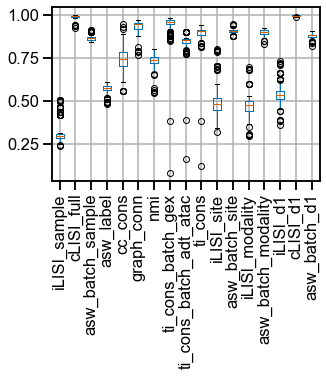

In [19]:
scores.drop("dims").T.boxplot(rot=90)

In [20]:
scores = scores.T

In [21]:
scores['Model'] = scores.index

In [22]:
def map_names(x):
    return 'liam (x1) mosaic full' if 'liam_mosaic_full_x1.0' in x else \
                                   'liam (x10) mosaic full' if 'liam_mosaic_full_x10.0' in x else \
                                   'liam (x25) mosaic full' if 'liam_mosaic_full_x25.0' in x else \
                                   'liam (x1) mosaic a' if 'liam_mosaic_a_x1.0' in x else \
                                   'liam (x10) mosaic a' if 'liam_mosaic_a_x10.0' in x else \
                                   'liam (x25) mosaic a' if 'liam_mosaic_a_x25.0' in x else \
                                   'liam (x1) mosaic b' if 'liam_mosaic_b_x1.0' in x else \
                                   'liam (x10) mosaic b' if 'liam_mosaic_b_x10.0' in x else \
                                   'liam (x25) mosaic b' if 'liam_mosaic_b_x25.0' in x else \
                                   'liam (x5) mosaic full' if 'liam_mosaic_full' in x else \
                                   'liam (x5) mosaic atac a' if 'liam_mosaic_atac_a' in x else \
                                   'liam (x5) mosaic rest a' if 'liam_mosaic_rest_a' in x else \
                                   'liam (x5) mosaic atac b' if 'liam_mosaic_atac_b' in x else \
                                   'liam (x5) mosaic rest b' if 'liam_mosaic_rest_b' in x else \
                                   'liam (x5) mosaic a' if 'liam_mosaic_a' in x else \
                                   'liam (x5) mosaic b' if 'liam_mosaic_b' in x else \
                                   'liam (x5) paired full' if 'liam_paired_full' in x else \
                                   'MultiVI mosaic full' if 'MultiVI_mosaic_full' in x else \
                                   'MultiVI mosaic a' if 'MultiVI_mosaic_a' in x else \
                                   'MultiVI mosaic b'

In [23]:
scores['Model'] = scores.index.map(lambda x:
                                   map_names(x))

In [24]:
scores['Model'].value_counts()

liam (x5) mosaic full      5
liam (x5) mosaic a         5
liam (x25) mosaic a        5
liam (x25) mosaic full     5
liam (x10) mosaic b        5
liam (x10) mosaic a        5
liam (x10) mosaic full     5
liam (x1) mosaic b         5
liam (x1) mosaic a         5
liam (x1) mosaic full      5
MultiVI mosaic b           5
MultiVI mosaic a           5
MultiVI mosaic full        5
liam (x5) paired full      5
liam (x5) mosaic rest b    5
liam (x5) mosaic atac b    5
liam (x5) mosaic rest a    5
liam (x5) mosaic atac a    5
liam (x5) mosaic b         5
liam (x25) mosaic b        5
Name: Model, dtype: int64

<Figure size 2880x1920 with 0 Axes>

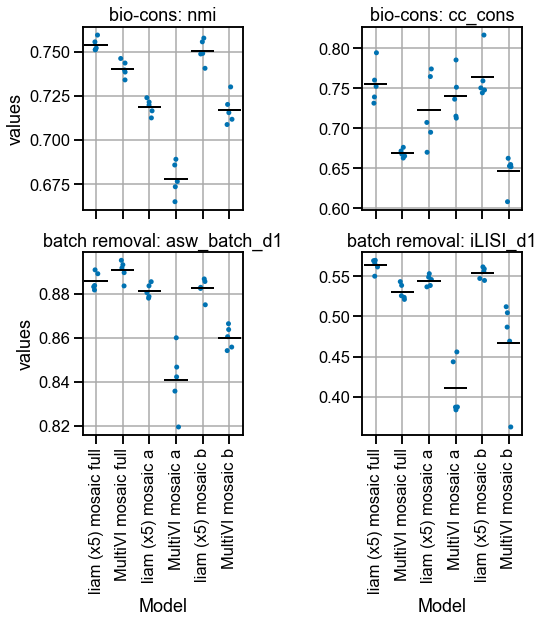

In [25]:
fig = plt.figure(dpi=600)

subset = scores.copy()
# Enforce specific ordering
cat_type = CategoricalDtype(categories=[
    'liam (x5) mosaic full',
    'MultiVI mosaic full',     
    'liam (x5) mosaic a',
    'MultiVI mosaic a',
    'liam (x5) mosaic b',
    'MultiVI mosaic b',    
], ordered=True)

subset['Model'] = subset['Model'].astype(cat_type)


# Reformat for sns compatibility to long format
subset_long = subset[['nmi','cc_cons','asw_batch_d1', 'iLISI_d1', 'Model']]
subset_long = pd.melt(subset_long, id_vars='Model', var_name='metric', value_name='values', ignore_index=False)
subset_long['metric'] = subset_long['metric'].map(lambda x: {'asw_label': 'bio-cons: asw_label',\
                                                            'nmi': 'bio-cons: nmi',\
                                                            'cc_cons': 'bio-cons: cc_cons',\
                                                            'ti_cons': 'bio-cons: ti_cons',\
                                                            'asw_batch_d1': 'batch removal: asw_batch_d1',\
                                                            'iLISI_d1': 'batch removal: iLISI_d1',\
                                                            'Model': 'Model'}[x])

# Plotting
aspect = len(subset_long['Model'].unique())/3*0.5
g = sns.FacetGrid(subset_long, col='metric', col_wrap=2, height=3.5, sharey=False, despine=False, aspect=aspect)
g.map(sns.stripplot, 'Model', 'values', jitter=True)#, hue='Model')
# https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot
g.map(sns.boxplot, 'Model', 'values', showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
g.map(plt.grid, color='darkgrey')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# https://github.com/mwaskom/seaborn/issues/867

g.set_titles(col_template='{col_name}')


plt.suptitle('')
fig.tight_layout()
plt.savefig('./figures/CU_mosaic_Fig5.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

<Figure size 2880x1920 with 0 Axes>

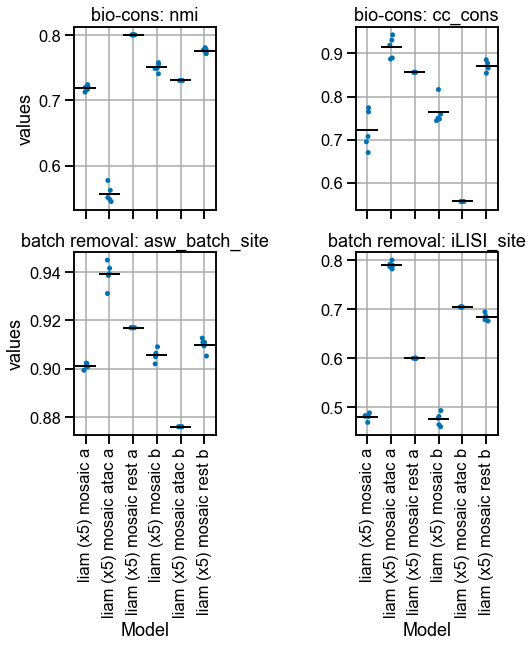

In [30]:
fig = plt.figure(dpi=600)

subset = scores.copy()
# Enforce specific ordering
# cat_type = CategoricalDtype(categories=sorted(subset['Model'].unique()), ordered=True)
cat_type = CategoricalDtype(categories=[
    'liam (x5) mosaic a',
    'liam (x5) mosaic atac a',
    'liam (x5) mosaic rest a',
    'liam (x5) mosaic b',
    'liam (x5) mosaic atac b',
    'liam (x5) mosaic rest b',  
], ordered=True)

subset['Model'] = subset['Model'].astype(cat_type)


# Reformat for sns compatibility to long format
subset_long = subset[['nmi','cc_cons','asw_batch_site', 'iLISI_site', 'Model']]
subset_long = pd.melt(subset_long, id_vars='Model', var_name='metric', value_name='values', ignore_index=False)
subset_long['metric'] = subset_long['metric'].map(lambda x: {'asw_label': 'bio-cons: asw_label',\
                                                            'nmi': 'bio-cons: nmi',\
                                                            'cc_cons': 'bio-cons: cc_cons',\
                                                            'ti_cons': 'bio-cons: ti_cons',\
                                                            'asw_batch_site': 'batch removal: asw_batch_site',\
                                                            'iLISI_site': 'batch removal: iLISI_site',\
                                                            'Model': 'Model'}[x])

# Plotting
aspect = len(subset_long['Model'].unique())/3*0.5
g = sns.FacetGrid(subset_long, col='metric', col_wrap=2, height=3.5, sharey=False, despine=False, aspect=aspect)
g.map(sns.stripplot, 'Model', 'values', jitter=True)#, hue='Model')
# https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot
g.map(sns.boxplot, 'Model', 'values', showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
g.map(plt.grid, color='darkgrey')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# https://github.com/mwaskom/seaborn/issues/867

g.set_titles(col_template='{col_name}')


plt.suptitle('')
fig.tight_layout()

plt.savefig('./figures/CU_mosaic_Fig5_supplement.png', bbox_inches='tight', transparent=True, dpi=600)

plt.show()

In [27]:
# supplementary figure with everything!

In [28]:
# drop paired full

<Figure size 2880x1920 with 0 Axes>

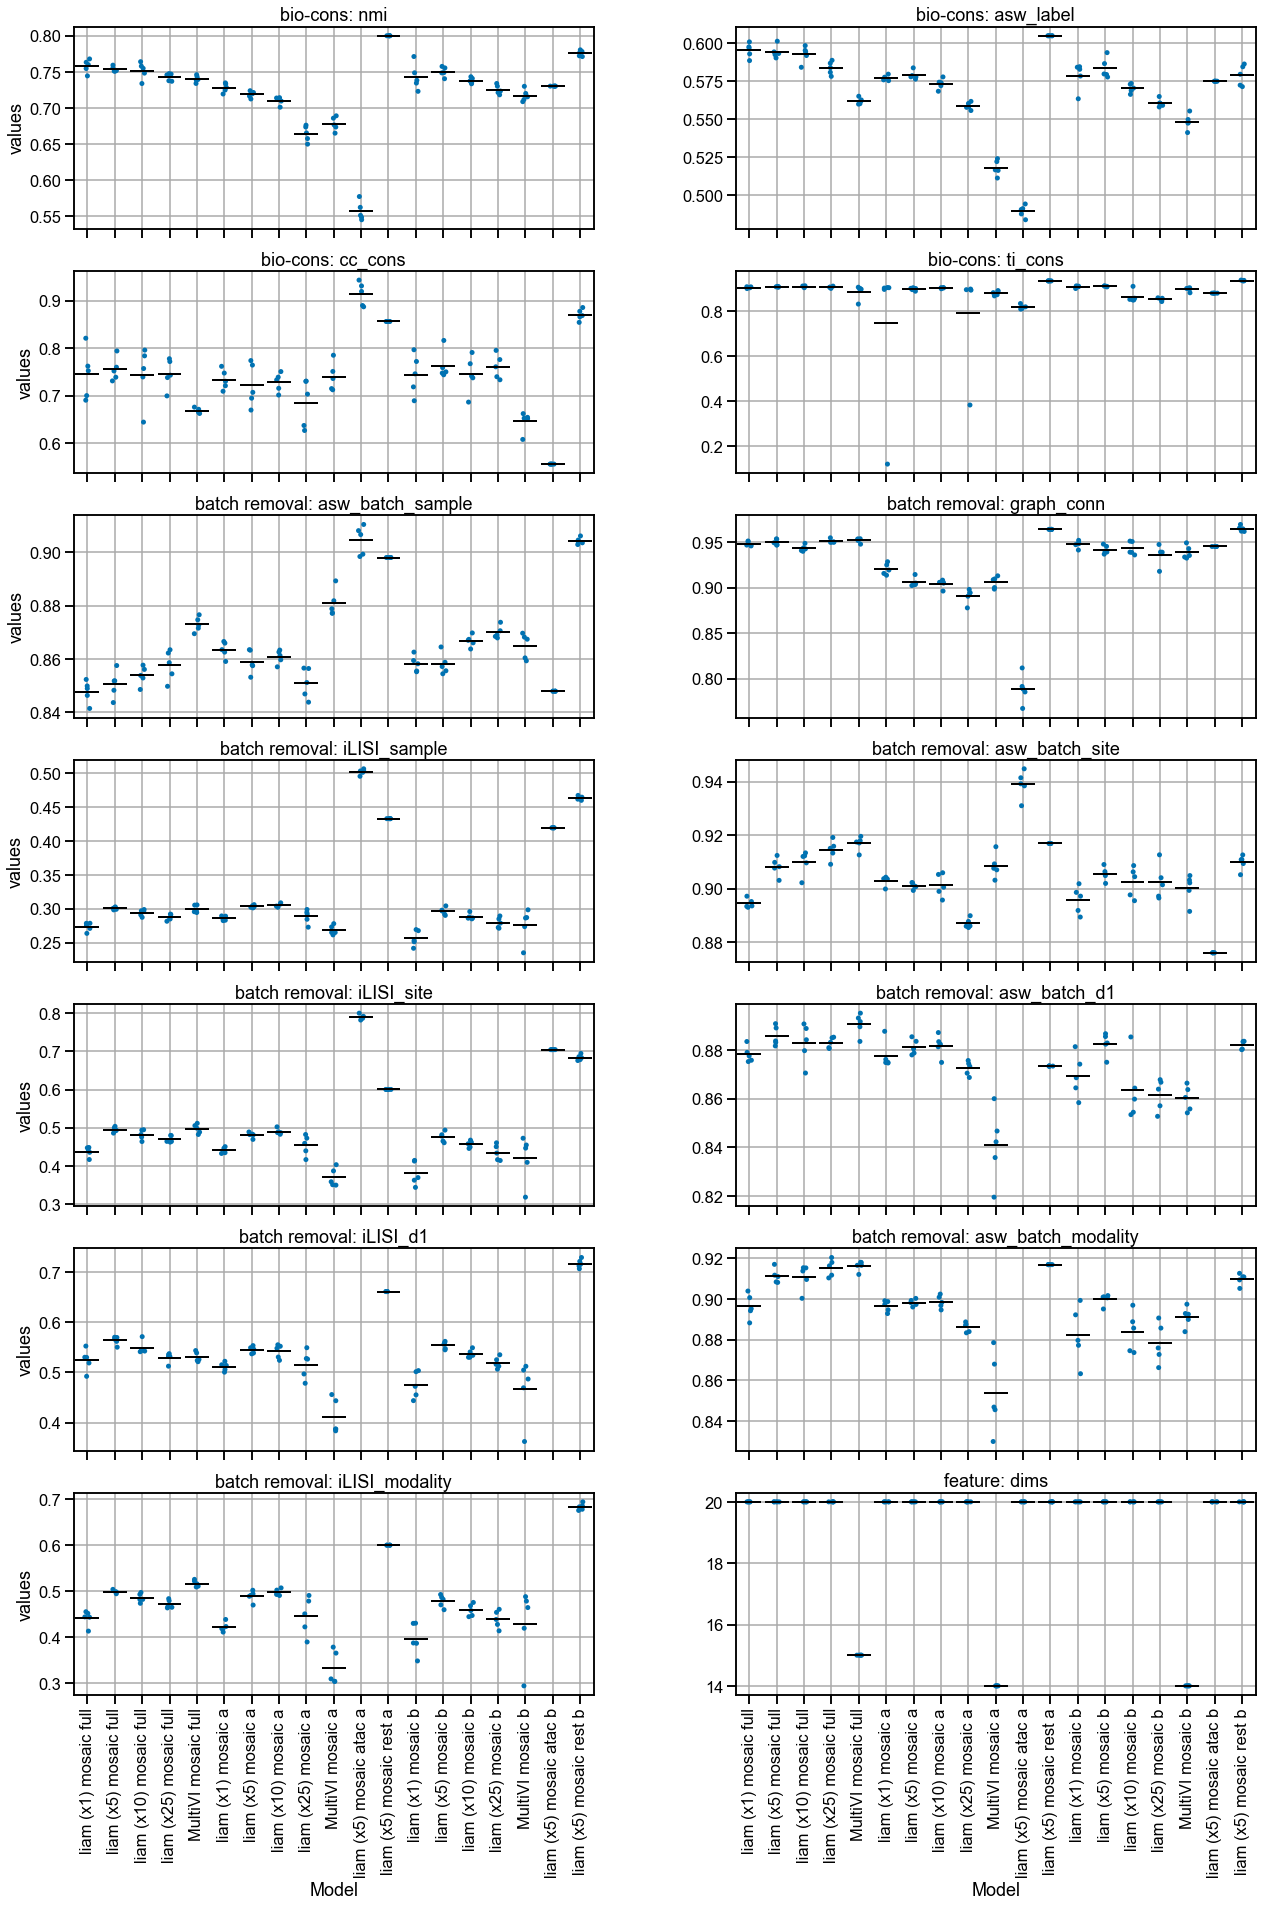

In [29]:
# Figure S6 - stripplot
fig = plt.figure(dpi=600)

subset = scores.copy()
# Enforce specific ordering
# cat_type = CategoricalDtype(categories=sorted(subset['Model'].unique()), ordered=True)
cat_type = CategoricalDtype(categories=['liam (x1) mosaic full', 'liam (x5) mosaic full', 'liam (x10) mosaic full',\
'liam (x25) mosaic full', 'MultiVI mosaic full',\
'liam (x1) mosaic a', 'liam (x5) mosaic a', 'liam (x10) mosaic a',\
'liam (x25) mosaic a', 'MultiVI mosaic a', 'liam (x5) mosaic atac a',\
'liam (x5) mosaic rest a',\
'liam (x1) mosaic b', 'liam (x5) mosaic b', 'liam (x10) mosaic b',\
'liam (x25) mosaic b', 'MultiVI mosaic b', 'liam (x5) mosaic atac b',\
'liam (x5) mosaic rest b'], ordered=True)
subset['Model'] = subset['Model'].astype(cat_type)


# Reformat for sns compatibility to long format
subset_long = subset[['nmi', 'asw_label', 'cc_cons', 'ti_cons', 'asw_batch_sample', 'graph_conn', 'iLISI_sample',
                                    'asw_batch_site', 'iLISI_site', 'asw_batch_d1', 'iLISI_d1', 'asw_batch_modality', 'iLISI_modality', 'dims', 'Model']]
subset_long = pd.melt(subset_long, id_vars='Model', var_name='metric/feature', value_name='values', ignore_index=False)

subset_long['metric/feature'] = subset_long['metric/feature'].map(lambda x: {'asw_label': 'bio-cons: asw_label',\
                                                            'nmi': 'bio-cons: nmi',\
                                                            'cc_cons': 'bio-cons: cc_cons',\
                                                            'ti_cons': 'bio-cons: ti_cons',\
                                                            'asw_batch_sample': 'batch removal: asw_batch_sample',\
                                                            'graph_conn': 'batch removal: graph_conn',\
                                                            'iLISI_sample': 'batch removal: iLISI_sample',\
                                                            'asw_batch_site': 'batch removal: asw_batch_site',\
                                                            'iLISI_site': 'batch removal: iLISI_site',\
                                                            'asw_batch_d1': 'batch removal: asw_batch_d1',\
                                                            'iLISI_d1': 'batch removal: iLISI_d1',
                                                            'asw_batch_modality': 'batch removal: asw_batch_modality',\
                                                            'iLISI_modality': 'batch removal: iLISI_modality',\
                                                            'dims': 'feature: dims',\
                                                            'Model': 'Model'}[x])

# Plotting

# Plotting
aspect = len(subset_long['Model'].unique())/3*0.4
g = sns.FacetGrid(subset_long, col='metric/feature', col_wrap=2, height=3.5, sharey=False, despine=False, aspect=aspect)
g.map(sns.stripplot, 'Model', 'values', jitter=True)#, hue='Model')
# https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot
g.map(sns.boxplot, 'Model', 'values', showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
g.map(plt.grid, color='darkgrey')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# https://github.com/mwaskom/seaborn/issues/867

g.set_titles(col_template='{col_name}')

plt.suptitle('')
fig.tight_layout()

plt.savefig('./figures/CU_mosaic_all.png', bbox_inches='tight', transparent=True, dpi=600)

plt.show()


